In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
life_df = pd.read_csv('Life Expectancy Data.csv')  # Adjust file name if needed

In [ ]:
# Check Dataset Info
print(life_df.info())
print(life_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Handle Missing Values
# Select only numeric columns for calculating the mean
numeric_cols = life_df.select_dtypes(include=np.number).columns
life_df[numeric_cols] = life_df[numeric_cols].fillna(life_df[numeric_cols].mean())

In [ ]:
# Drop Unnecessary Columns (if any)
if 'Country' in life_df.columns:
    life_df.drop(['Country'], axis=1, inplace=True)

In [ ]:
# Encoding Categorical Variables
if 'Status' in life_df.columns:
    life_df = pd.get_dummies(life_df, columns=['Status'], drop_first=True)

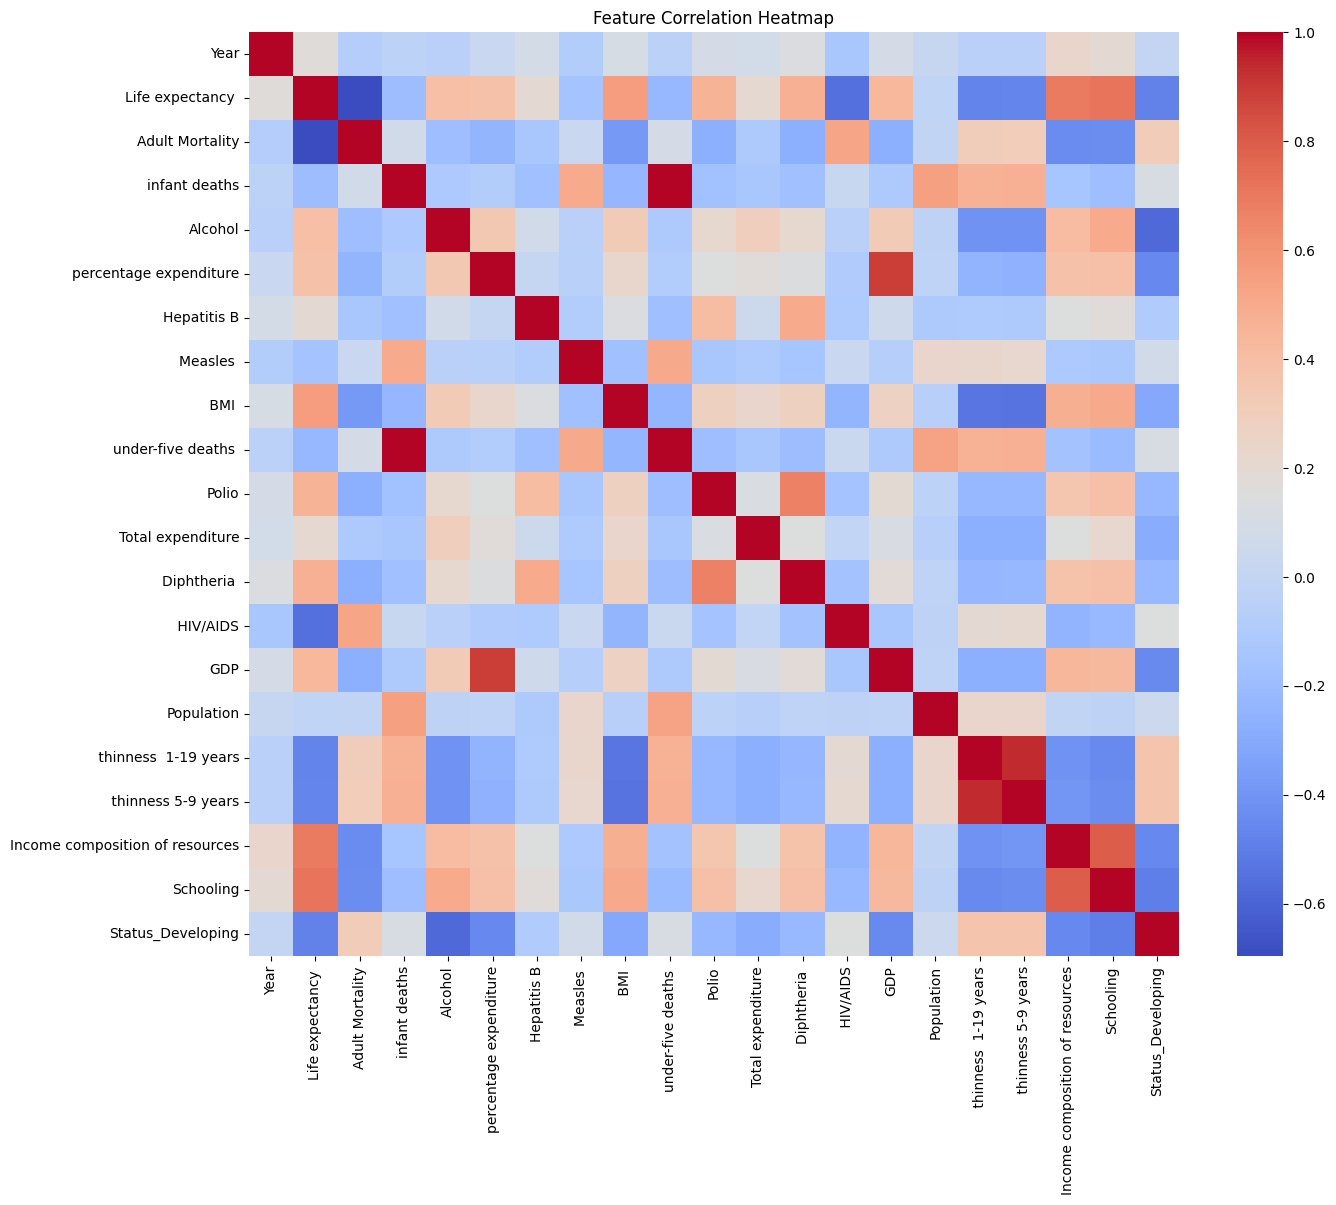

In [ ]:
# Feature Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(life_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Define Features and Target
X = life_df.drop('Life expectancy ', axis=1)
y = life_df['Life expectancy ']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Initialization
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)

In [ ]:
# Train Models
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Predictions
rf_pred = rf_reg.predict(X_test)
xgb_pred = xgb_reg.predict(X_test)
gb_pred = gb_reg.predict(X_test)

In [ ]:
# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R² Score: {r2:.4f}\n")

In [ ]:
# Evaluate All Models
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, gb_pred, "Gradient Boosting")

Random Forest RMSE: 1.65
Random Forest R² Score: 0.9687

XGBoost RMSE: 1.75
XGBoost R² Score: 0.9648

Gradient Boosting RMSE: 2.06
Gradient Boosting R² Score: 0.9510



In [ ]:
# Feature Importance (XGBoost)
xgb_features = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values(ascending=False)

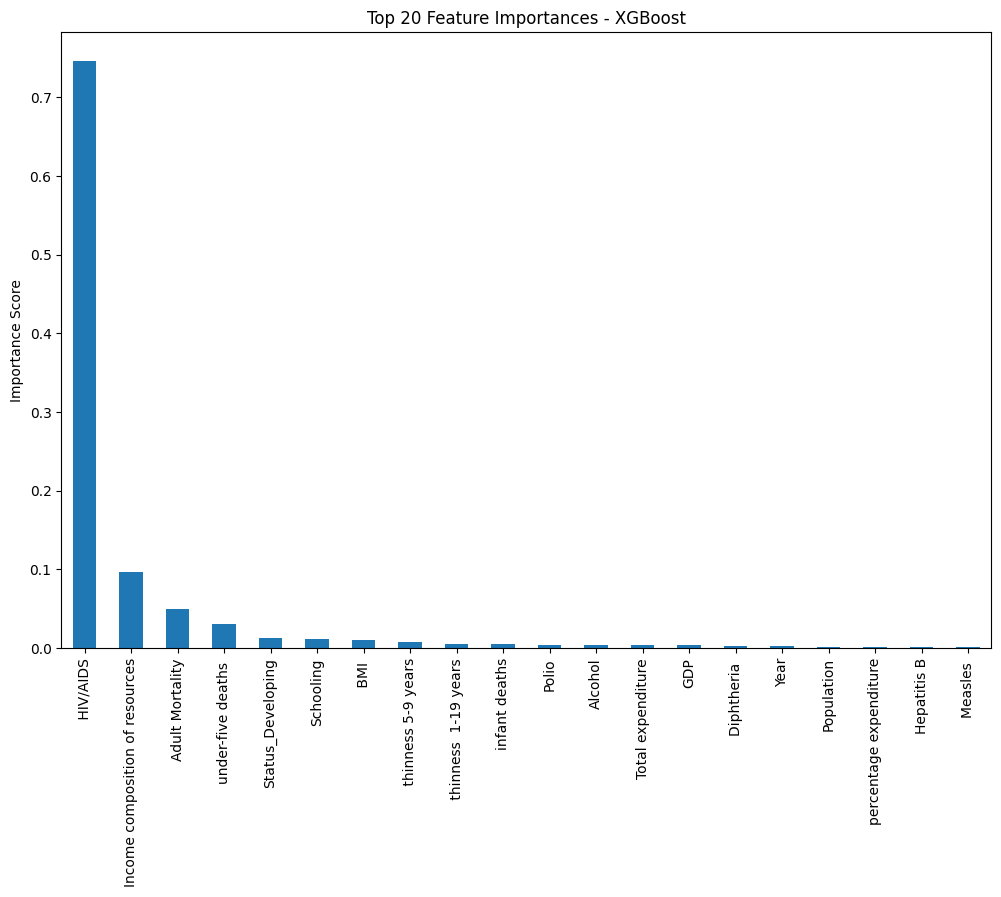

In [ ]:
plt.figure(figsize=(12, 8))
xgb_features.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances - XGBoost')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
# Grid Search for XGBoost (Optional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

Best Parameters from Grid Search:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
